In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset overview

In [21]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/raw/training.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [22]:
df.columns.tolist()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

In [23]:
print("Shape:", df.shape)
df.info()

Shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  

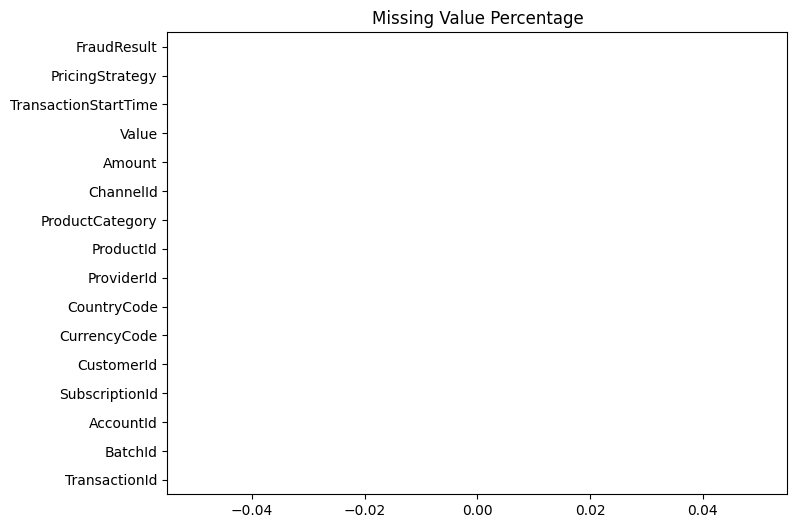

In [26]:
# missing values
missing = df.isna().mean().sort_values(ascending=False)
missing.plot(kind='barh', figsize=(8,6), title="Missing Value Percentage")
plt.show()

In [29]:
# basic stats for numeric columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


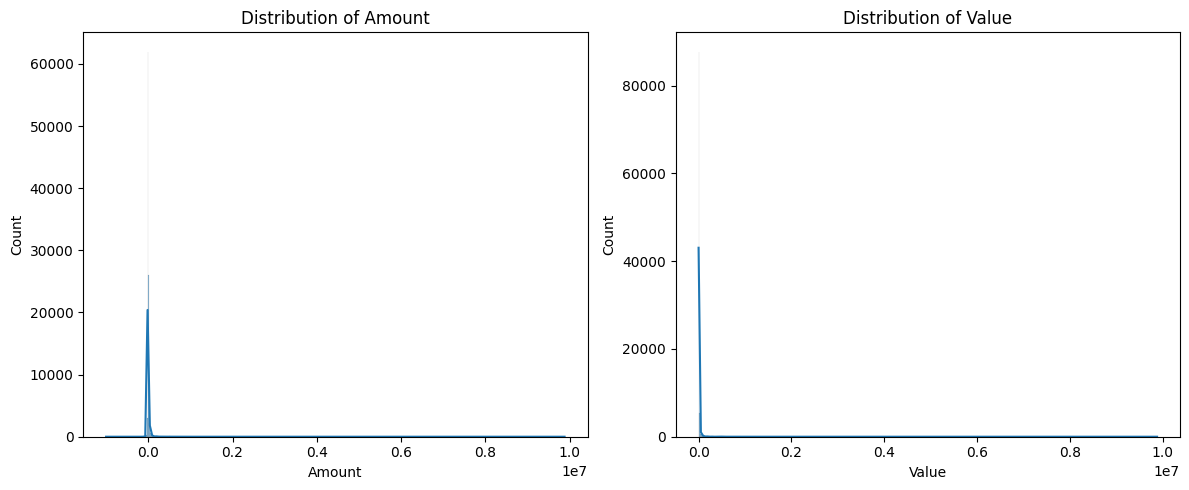

In [30]:
# Distribution checks for numeric fields
num_cols = ['Amount', 'Value']
plt.figure(figsize=(12,5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

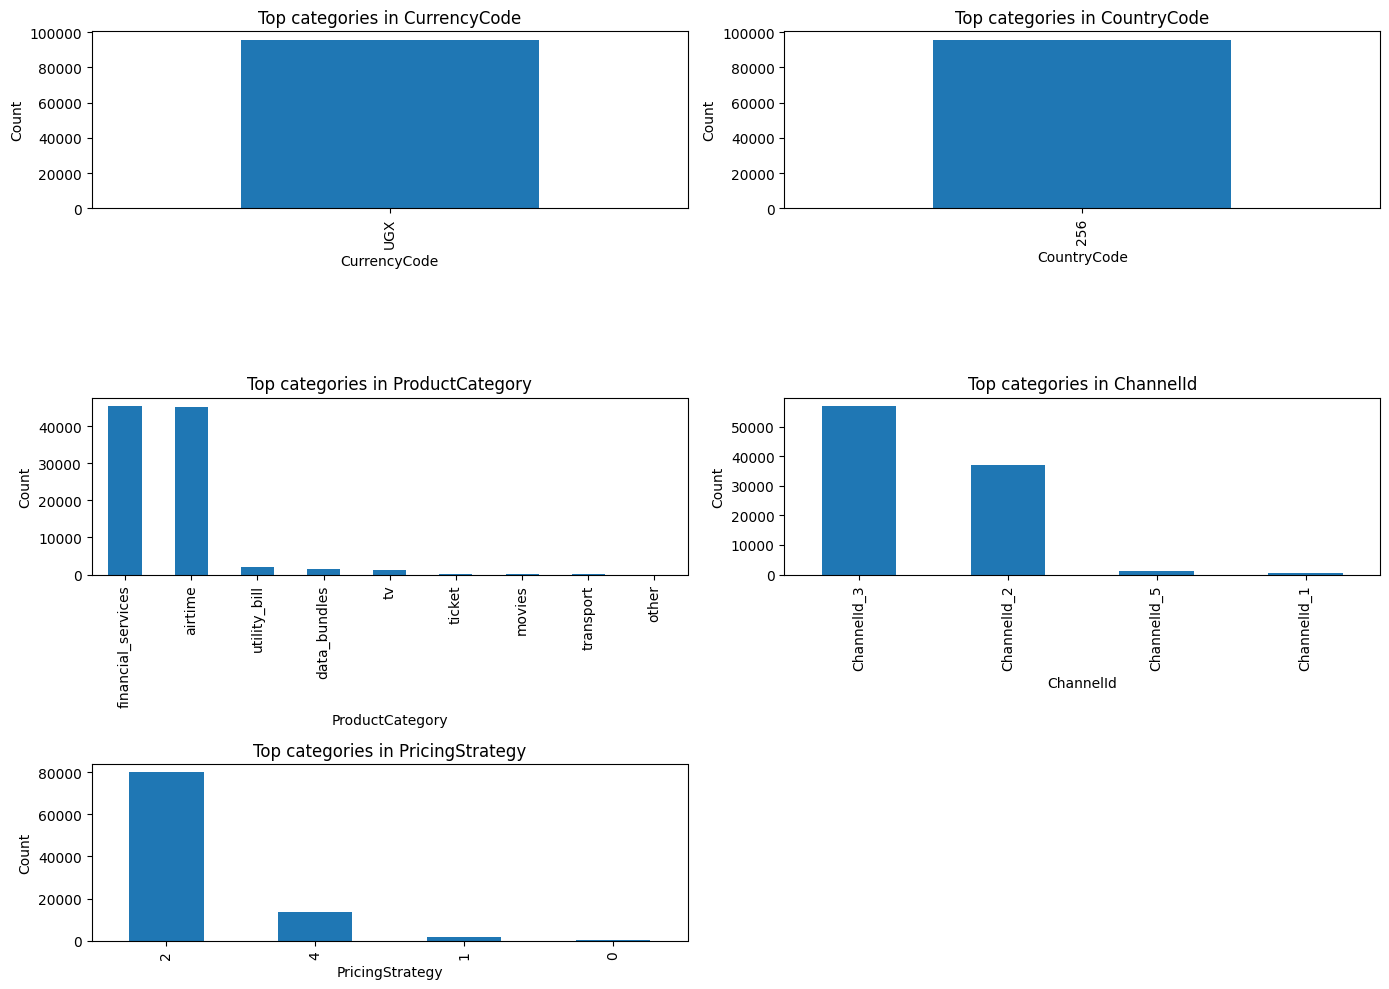

In [33]:
# Count plots for important categorical columns
cat_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory',
            'ChannelId', 'PricingStrategy']

plt.figure(figsize=(14,10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [36]:
# convert transactionstatetime to date time
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionStartTime'].describe()

count                                  95662
mean     2019-01-02 01:15:52.886433536+00:00
min                2018-11-15 02:18:49+00:00
25%      2018-12-12 09:47:57.750000128+00:00
50%                2018-12-31 17:20:45+00:00
75%         2019-01-25 10:54:47.500000+00:00
max                2019-02-13 10:01:28+00:00
Name: TransactionStartTime, dtype: object

In [37]:
# time based insights
df['hour'] = df['TransactionStartTime'].dt.hour
df['day'] = df['TransactionStartTime'].dt.day
df['month'] = df['TransactionStartTime'].dt.month
df['year'] = df['TransactionStartTime'].dt.year
df[['hour', 'day', 'month', 'year']].head()

,hour,day,month,year
0,2,15,11,2018
1,2,15,11,2018
2,2,15,11,2018
3,3,15,11,2018
4,3,15,11,2018


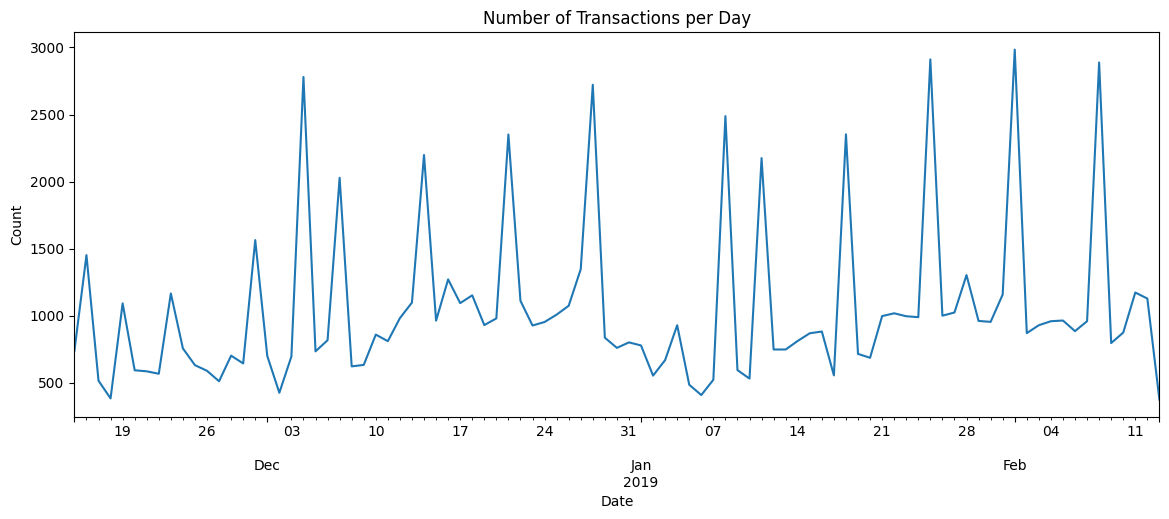

In [38]:
# number of transactions over time
df.set_index('TransactionStartTime')['TransactionId'].resample('D').count().plot(figsize=(14,5))
plt.title("Number of Transactions per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

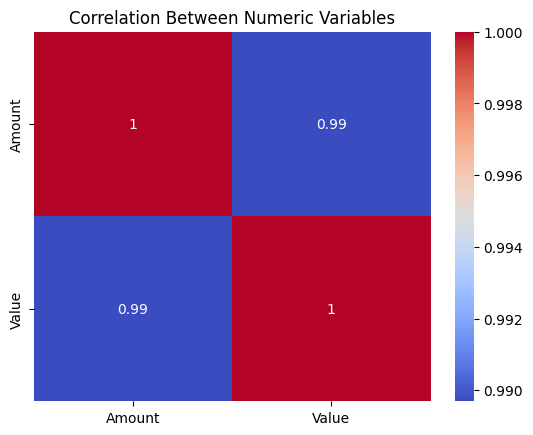

In [39]:
# numeric correlation
num_df = df[['Amount', 'Value']]
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()

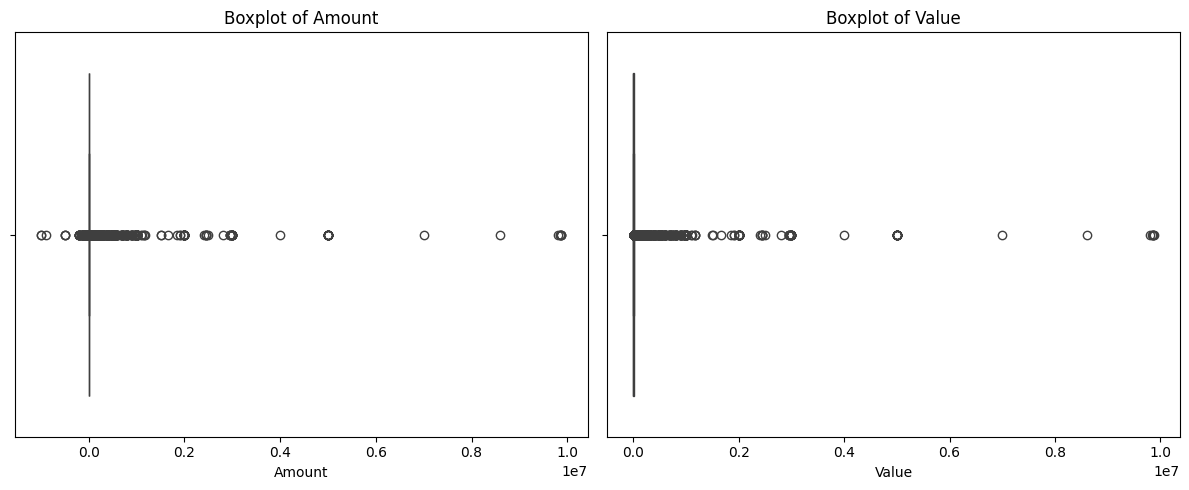

In [40]:
# outlier detection
plt.figure(figsize=(12,5))

for i, col in enumerate(['Amount', 'Value']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [43]:
# customer behaviour baseline
customer_summary = (
    df.groupby("CustomerId")
      .agg(
          total_transactions=("TransactionId", "count"),
          total_spent=("Value", "sum"),
          avg_spent=("Value", "mean"),
      )
)

customer_summary.describe()

,total_transactions,total_spent,avg_spent
count,3742.000000,3.742000e+03,3.742000e+03
mean,25.564404,2.531025e+05,1.875612e+04
std,96.929602,2.715877e+06,1.674529e+05
min,1.000000,5.000000e+01,5.000000e+01
25%,2.000000,6.500000e+03,1.160655e+03
50%,7.000000,3.200000e+04,3.950000e+03
75%,20.000000,1.020600e+05,7.096039e+03
max,4091.000000,1.049000e+08,8.601821e+06


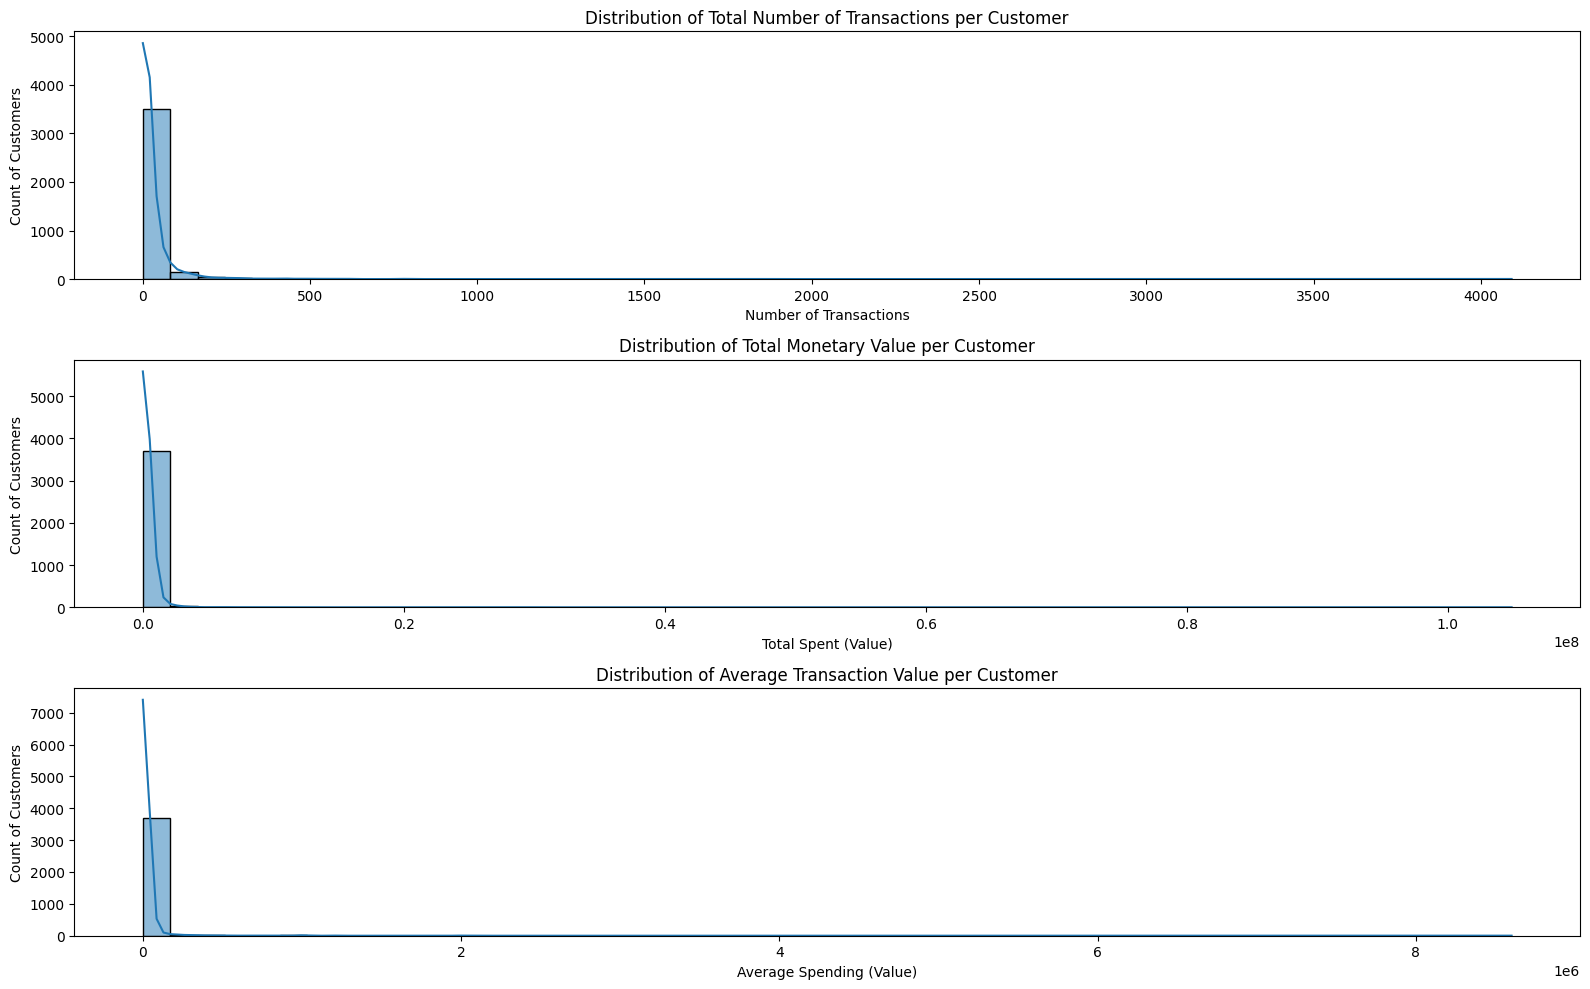

In [45]:
# plot customer behaviour 
plt.figure(figsize=(16,10))

# 1  Total transactions
plt.subplot(3, 1, 1)
sns.histplot(customer_summary['total_transactions'], bins=50, kde=True)
plt.title("Distribution of Total Number of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Count of Customers")

# 2  Total amount spent
plt.subplot(3, 1, 2)
sns.histplot(customer_summary['total_spent'], bins=50, kde=True)
plt.title("Distribution of Total Monetary Value per Customer")
plt.xlabel("Total Spent (Value)")
plt.ylabel("Count of Customers")

# 3  Average amount spent
plt.subplot(3, 1, 3)
sns.histplot(customer_summary['avg_spent'], bins=50, kde=True)
plt.title("Distribution of Average Transaction Value per Customer")
plt.xlabel("Average Spending (Value)")
plt.ylabel("Count of Customers")

plt.tight_layout()
plt.show()